# Roving Balls

*An appropriately named dyamic dataset generator.*

This is a demo of the roving balls generator which will produce two gaussian clusters of datapoints that rotate around a common centre.

## Why?

After half of a period, the cluster centers will have exactly switched locations. This makes classification very difficult in batch mode, but online algorithms should have decision boundaries that rotate along with the balls.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from olac.data_generators import roving_balls

from IPython import display
import time

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,9,)

In [3]:
help(roving_balls)

Help on function roving_balls in module olac.data_generators:

roving_balls(balls=2, steps=1000, period=1000, radius=5, vars=1, center=(0, 0))
    Generator for the roving balls dataset.
    
    The generator will terminate after `steps` steps, or will go on forever if
    `steps==0`.
    
    See notebooks/jdp-data-roving-balls.ipynb for examples.
    
    Parameters
    ----------
    balls : int
        The number of balls to use
    steps : int
        Number of steps to generate. Will generate forever if `steps==0`.
    period : int
        Period of rotation of the balls
    radius : int
        Radius of the entire dataset
    vars : float or iterable
        The variances of the balls. If float, each ball will have the same var
    center : tuple
        The center of the entire dataset
    
    Yields
    ------
    np.ndarray
        Data point of form [x1, x2, label]



We can visualize what's happening in the dataset with a little animation:

In [4]:
colors = ['r','g','b']

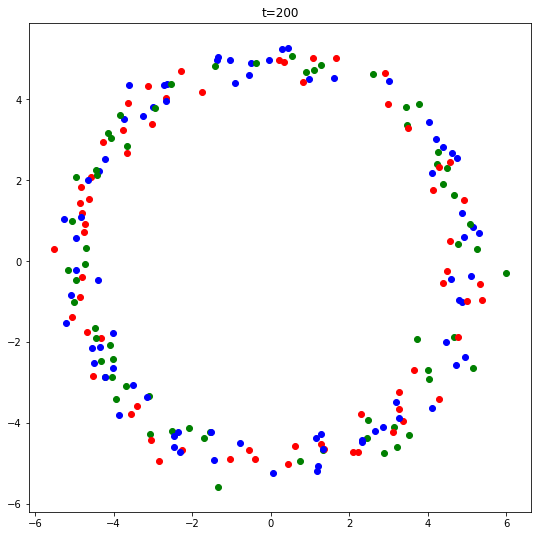

In [5]:
for t, x in enumerate(roving_balls(balls=3, steps=200, period=200, vars=0.3)):
    plt.scatter(*x[:2], color=colors[int(x[-1])])
    plt.title(f't={t}')
    display.clear_output(wait=True)
    display.display(plt.gcf())

display.clear_output()

It's also easy to generate a dataframe of the balls for batch testing:

In [6]:
df = pd.DataFrame(roving_balls(balls=3, steps=10000, period=15000, vars=1), columns=['x1','x2','y'])
df.index.name = 't'

In [7]:
df.head()

,x1,x2,y
t,,,
0,-0.118225,4.515035,0.0
1,1.232283,3.653083,0.0
2,-0.894230,5.433963,0.0
3,-0.205020,5.084599,0.0
4,-0.089824,4.683047,0.0


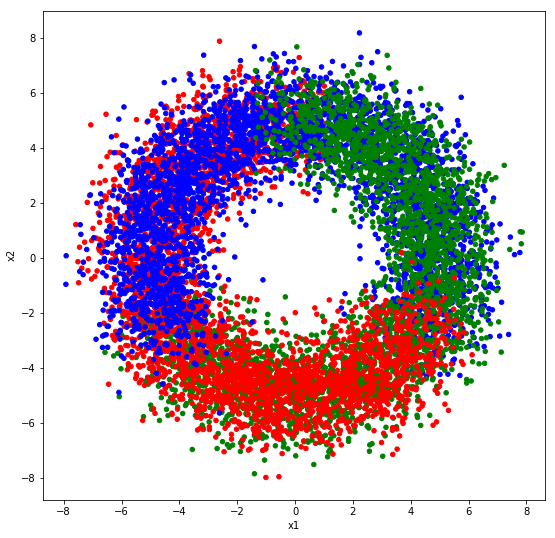

In [8]:
df.plot.scatter('x1', 'x2', c=df['y'].apply(lambda x: colors[int(x)]));